In [10]:
import argparse
import io
import glob
import random
from google.cloud import vision
from PIL import Image, ImageDraw
import os


In [11]:

def get_crop_hint(path):
    """Detect crop hints on a single image and return the first result."""
    client = vision.ImageAnnotatorClient.from_service_account_file("/home/darshansonde/Code/work/2021_tolaram/insureka-mlserver/src/k8s/secrets/gcloud/som-insureka-38973b257792.json")

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    crop_hints_params = vision.CropHintsParams(aspect_ratios=[1.77])
    image_context = vision.ImageContext(crop_hints_params=crop_hints_params)

    response = client.crop_hints(image=image, image_context=image_context)
    hints = response.crop_hints_annotation.crop_hints

    # Get bounds for the first crop hint using an aspect ratio of 1.77.
    vertices = hints[0].bounding_poly.vertices

    return vertices


def draw_hint(image_file):
    """Draw a border around the image using the hints in the vector list."""
    vects = get_crop_hint(image_file)

    im = Image.open(image_file)
    draw = ImageDraw.Draw(im)
    draw.polygon([
        vects[0].x, vects[0].y,
        vects[1].x, vects[1].y,
        vects[2].x, vects[2].y,
        vects[3].x, vects[3].y], None, 'red')
    im.save('output-hint.jpg', 'JPEG')
    print('Saved new image to output-hint.jpg')


def crop_to_hint(image_file):
    """Crop the image using the hints in the vector list."""
    vects = get_crop_hint(image_file)

    im = Image.open(image_file)
    im2 = im.crop([vects[0].x, vects[0].y,
                  vects[2].x - 1, vects[2].y - 1])
    im2.save('output-crop.jpg', 'JPEG')
    print('Saved new image to output-crop.jpg')


In [12]:
DATA_DIR = "../data/interim/2022-01-06_combined_orc_kyc"
DATA_KEY_DIR = "../data/interim/2022-01-06_combined_orc_kyc-key-fields"
TRAIN_DATA_KTP_KEY_FIELD_DIR = f"{DATA_KEY_DIR}/KTP_TRAIN"
VAL_DATA_KTP_KEY_FIELD_DIR = f"{DATA_KEY_DIR}/KTP_VAL"
TEST_DATA_KTP_KEY_FIELD_DIR = f"{DATA_KEY_DIR}/KTP_TEST"
ANNOTATION_FILE = f"{DATA_DIR}/ktp_ground_truth.csv"
KTP_KEY_FIELD_CLASS_FILE = f"{TRAIN_DATA_KTP_KEY_FIELD_DIR}/classes.txt"

In [17]:
files = glob.glob(f"{DATA_KEY_DIR}/KTP/*.jpeg")


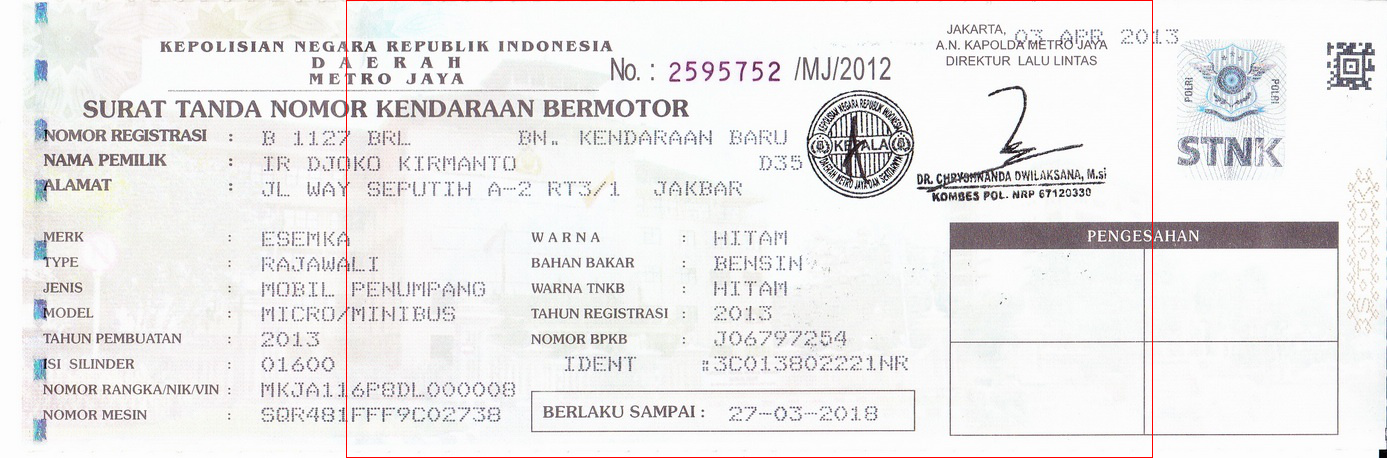

In [19]:

image_file = random.choice(files)
vects = get_crop_hint(image_file)
im = Image.open(image_file)
draw = ImageDraw.Draw(im)
draw.polygon([
    vects[0].x, vects[0].y,
    vects[1].x, vects[1].y,
    vects[2].x, vects[2].y,
    vects[3].x, vects[3].y], None, 'red')
im

In [20]:
image_file

'../data/interim/2022-01-06_combined_orc_kyc-key-fields/KTP/STNK9.jpeg'